<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/01_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃 알고리즘

- 지도학습 알고리즘 중 하나
- 굉장히 직관적이고 간단한 알고리즘
- 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 많은 데이터가 포함되어 있는 범주로 분류하는 방식
- knn의 특징은 훈련이 따로 필요 없다는 것이다. 즉, 다른 모델들은 fit(X_train, y_train)의 코드를 통해 훈련을 시킨다. 다시말해 훈련데이터를 기반으로 모델을 만들고 테스트를 하는 방식이지만 knn은 훈련데이터를 저장하는 것이 훈련의 전부이다.
- 모델을 별도로 구축하지 않는다는 뜻으로 게으른 모델(lazy model)이라고도 부른다.

## Module Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Set Loading
- 생선을 분류하기 위해 생선의 길이와 무게를 사용하여 분석한다.
- 35마리의 도미데이터를 분석

In [ ]:
## 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
## 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
                925.0, 975.0, 950.0]

## 데이터 탐색(EDA)

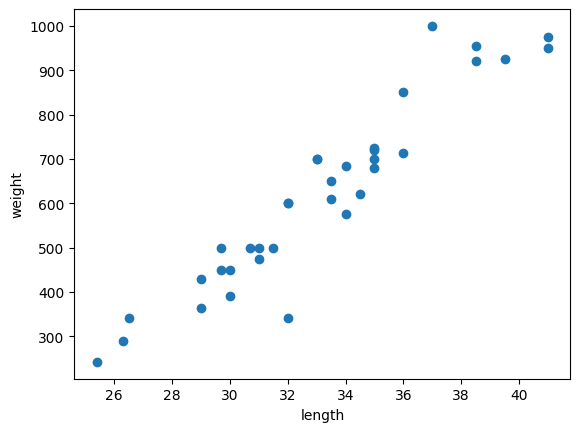

In [ ]:
# scatter: 산점도(산포도)
# 갈이: x, 무게: y
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이와 무게가 선형관계라는 것을 알 수 있다.
- 길이가 길면 무게가 많이 나간다.

In [ ]:
# 14마리의 빙어 데이터(길이와 무게)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

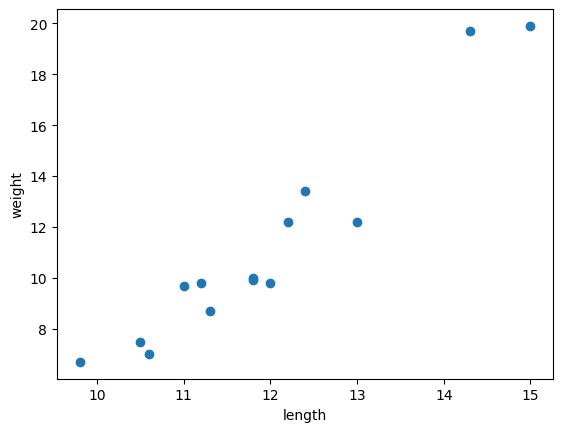

In [ ]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

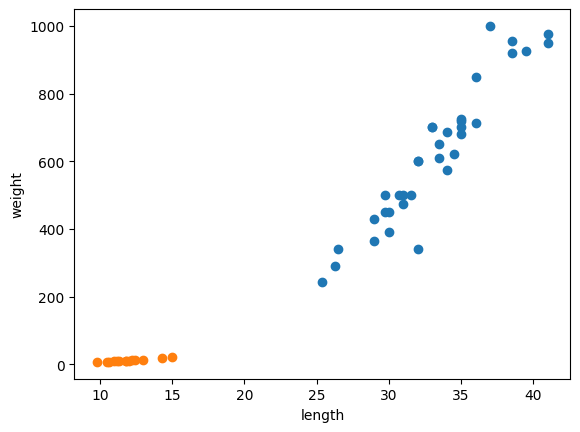

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 머신러닝 학습을 위한 데이터의 특성을 2차원 형태의 Numpy 배열로 만들어줘야한다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
length

[25.4,
 26.3,
 26.5,
 29.0,
 29.0,
 29.7,
 29.7,
 30.0,
 30.0,
 30.7,
 31.0,
 31.0,
 31.5,
 32.0,
 32.0,
 32.0,
 33.0,
 33.0,
 33.5,
 33.5,
 34.0,
 34.0,
 34.5,
 35.0,
 35.0,
 35.0,
 35.0,
 36.0,
 36.0,
 37.0,
 38.5,
 38.5,
 39.5,
 41.0,
 41.0,
 9.8,
 10.5,
 10.6,
 11.0,
 11.2,
 11.3,
 11.8,
 11.8,
 12.0,
 12.2,
 12.4,
 13.0,
 14.3,
 15.0]

In [ ]:
fish_data = [[l,w] for l,w in zip(length, weight)]

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
# 도미(1), 방어(0)
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Modeling
- knn 알고리즘 : 2진 분류 알고리즘

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 객체 생성, model
knn = KNeighborsClassifier() # p = 2(유클리드안 거리), n_neighbors = 5
# 학습
model = knn.fit(fish_data, fish_target)
# 평가(정확도 검사)
model.score(fish_data, fish_target)

1.0

## 예측(predict)
- 새로운 데이터를 추가하여 분류하는 작업
- 길이 30, 무게 600인 데이터

In [ ]:
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [ ]:
knn.predict([[30,600]])
# 1(도미)로 예측

array([1])

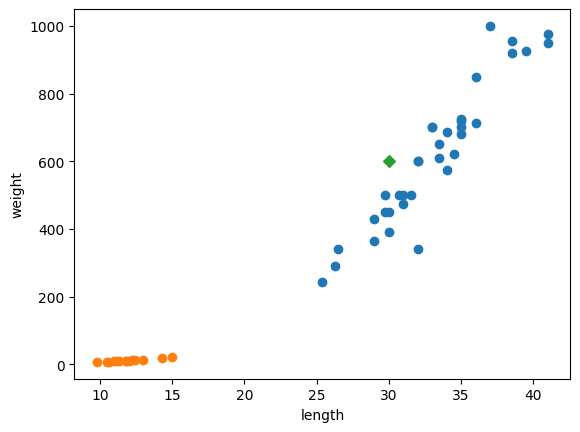

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 데이터 = 특성 = feature
model._fit_X # 모델 피팅을 시켰을때 담고 있던 데이터

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
model._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
knn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
knn49 = KNeighborsClassifier(n_neighbors = 49)
knn49.fit(fish_data, fish_target)
knn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
35/49

0.7142857142857143

# 훈련 데이터와 테스트 데이터 분리

In [ ]:
print(type(fish_data))
print(type(fish_target))

<class 'list'>
<class 'list'>


In [ ]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
# 49개 = 35:14
# 기존의 데이터를 그대로 분리하는 작업
# X_train, X_test, y_train, y_test

# 데이터를 섞지 않고 쓸 시 생기는 문제를 보자

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# 학습에 빙어는 없이 도미만 있으니 score가 박살난다

0.0

## 무작위로 데이터를 섞는 작업

In [ ]:
# numpy 라이브러리가 제공하는 shuffle()
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
input_arr.shape

(49, 2)

In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [ ]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [ ]:
# 주의할 점은 input과 target은 같은 위치에 함께 선택되어야 한다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


## 시각화를 통한 데이터 분석
- 도미 데이터와 빙어 데이터가 잘 섞여있는지 확인하는 작업

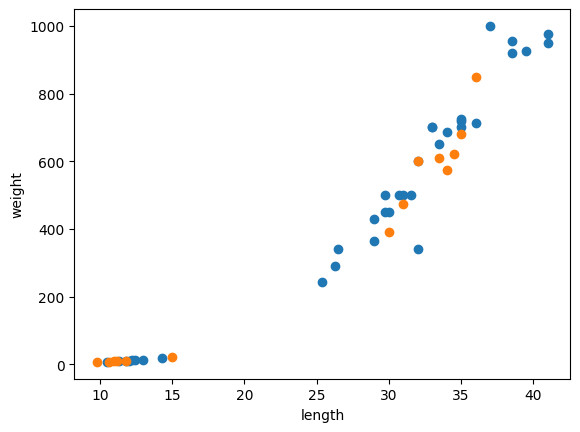

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 예측
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# 실제 결과값
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 이웃수 k의 최적화 찾기

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(3,50):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)

    #100% 정확도에 미치지 못하는 이웃의 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


In [ ]:
# 예측
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# 실제 결과값
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리(preprocessing)

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

**column_stack()**
- 배열을 합치는데 사용되는 함수는 크게 stack류 함수와 concatenate 함수가 있다.
- stack류 : vstack, hstack, np.column_stack
- concatenate() : 행과 열을 자유롭게 지정하여 합치기가 가능
- column_stack() : 1차원 벡터를 열벡터로 인식하여 연결, 2차원부터 hstack과 동일

In [ ]:
# column_stack()
np.column_stack([[1,2,3],[4,5,6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.concatenate((a,b), axis = 0)

array([1, 2, 3, 4, 5, 6])

In [ ]:
# np.ones(), np.zeros()
fish_target = np.concatenate([np.ones(35),np.zeros(14)])

## 훈련 데이터와 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

# 전달된 배열 하나의 값을 두 개의 배열로 분할
# 분할 비율 : test_size

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


**sample(행, 데이터포인트)의 편향이 의심된다.**

- 일부 클래스(분류 알고리즘일 때, target을 class)의 개수가 적을 때, 랜덤으로 섞어도 샘플링에 편항이 있을 가능성이 있다.

In [ ]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)

In [ ]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

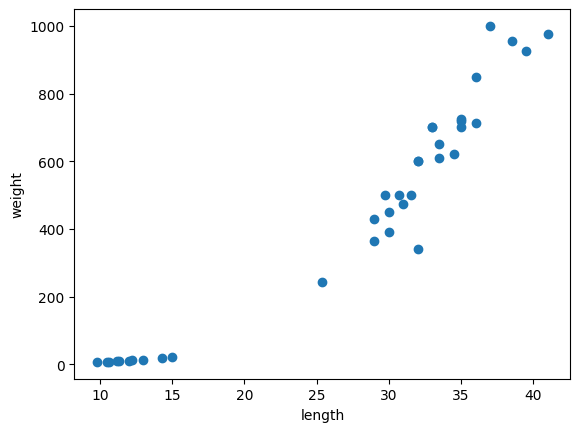

In [ ]:
# 학습에 사용된 데이터를 이용한 시각화
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 예측 25cm, 150g 물고기를 예측
kn.predict([[25,150]])

array([0.])

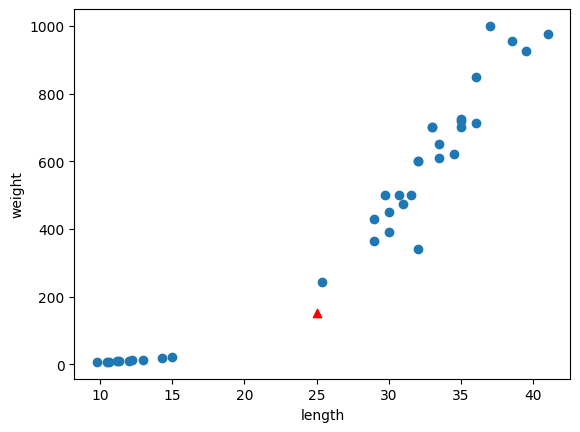

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^', color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# kneighbors(): 이웃까지의 거리와 이웃의 샘플 인덱스를 반환하는 함수
distances, indexes = kn.kneighbors([[25, 150]])

In [ ]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [ ]:
indexes

array([[21, 33, 19, 30,  1]])

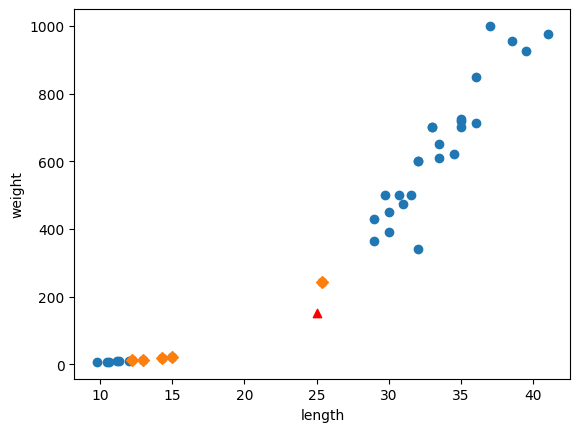

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', color= 'red')
# 이웃객체 추가
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

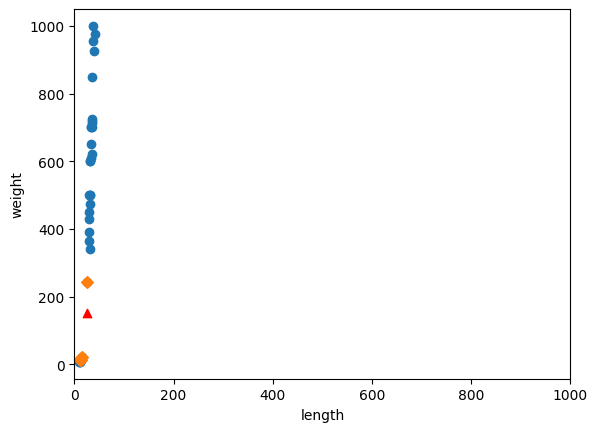

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', color= 'red')
# 이웃객체 추가
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 1000)
plt.show()

## 피처 스케일링

- 두 특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.
- 최소-최대 정규화(Min-Max Normalization) Xnew = X-min(X) / max(X) -min(X)
- Z-점수(Z-value standardization) Xnew = X - mean(X) / std(X)


In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [ ]:
# 스케일링된 피쳐값
train_scaled = (train_input - mean)/std

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled[:3]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496]])

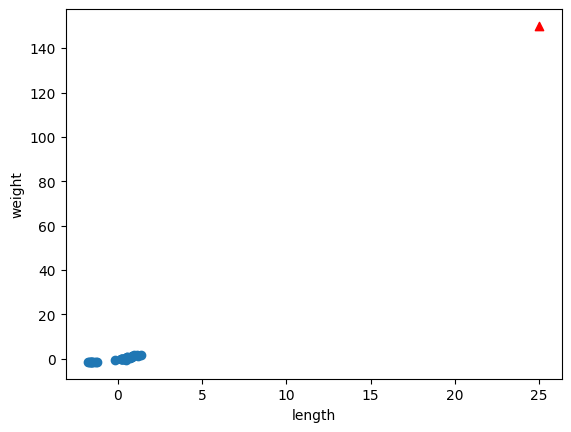

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^', color= 'red') # 얘는 아직 표준화 안돼있다

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 샘플도 표준화
new = ([25, 150] -mean ) /std

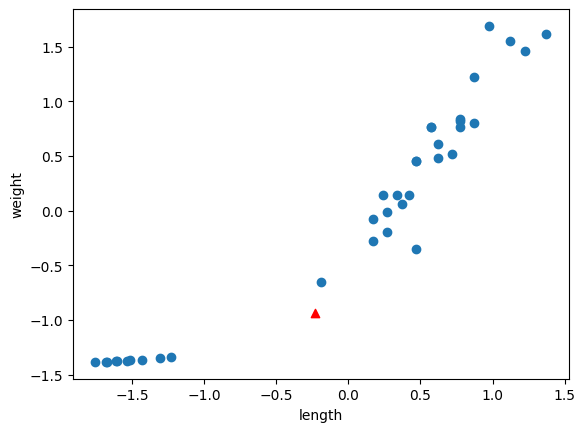

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^', color= 'red')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
# test 데이터도 표준화
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
kn.predict([new])

array([1.])

In [ ]:
distances, indexes = kn.kneighbors([new])

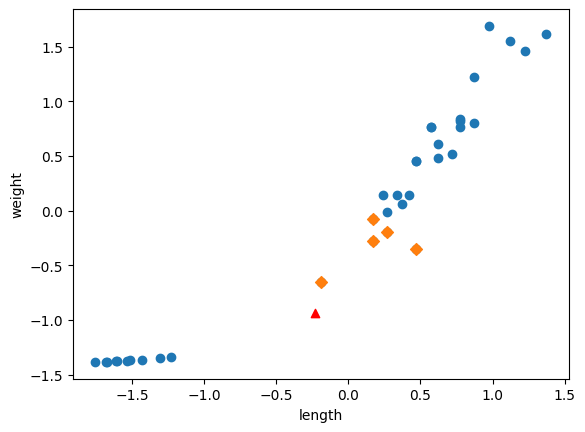

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^', color= 'red')
# 이웃객체 추가
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 확인 학습

- kaggle 데이터 Orange vs Grapefruit
- 데이터 셋: www.kaggle.com/joshmcadams/oranges-vs-grapefruit

## 두 번째 방법
- scikit-learn 라이브러리를 이용한 방법(csv 파일을 불러옴)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
citrus = pd.read_csv('citrus.csv')
citrus

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
citrus.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
citrus.name.unique()

array(['orange', 'grapefruit'], dtype=object)

In [ ]:
citrus.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [ ]:
citrus.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

- Binary Classification(이진분류)

### 시각화를 통한 데이터 탐색

<Axes: xlabel='diameter', ylabel='weight'>

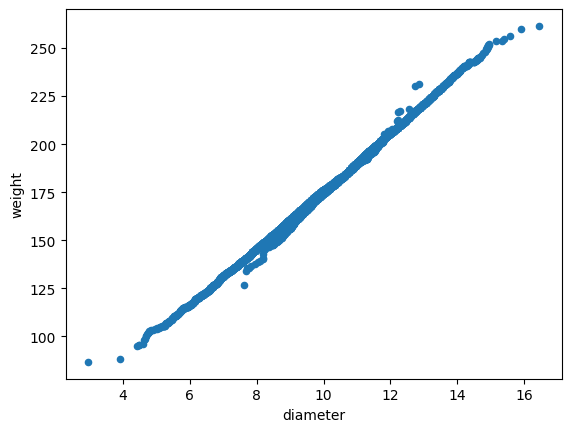

In [ ]:
citrus.plot(kind = 'scatter', x= 'diameter', y='weight')


<Figure size 1000x1000 with 0 Axes>

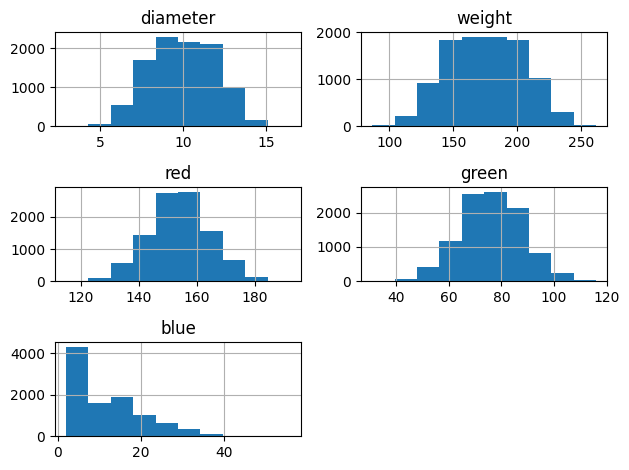

In [ ]:
plt.figure(figsize=(10, 10))
citrus.hist()
plt.tight_layout()
plt.show()

### Feature Extraction(특성 추출)

In [ ]:
# x = feature
# y = label of target

X = citrus[['diameter', 'weight', 'red', 'green', 'blue']]
y = citrus['name']

In [ ]:
X

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


### 훈련 데이터와 테스트 데이터의 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 2023)

In [ ]:
X_train.shape

(9000, 5)

In [ ]:
X_test.shape

(1000, 5)

### Standardize the data (데이터 정규화)

In [ ]:
# 변환(transform) - 비지도학습
scaler = StandardScaler()
# scaler.fit()
# scaler.transform()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Modeling(모델링)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test, y_test)

0.919

In [ ]:
# 훈련데이터의 정확도와 테스트 데이터의 정확도를 비교
knn.score(X_train, y_train)

0.9488888888888889

### Classification Report

In [ ]:
# 예측값
yhat = knn.predict(X_test)


In [ ]:
X_test[0]

array([ 1.69626468,  1.71498508,  0.39801184, -0.69740801, -0.38908726])

In [ ]:
knn.predict([[2.98, 86.76, 172, 85, 2]])

array(['orange'], dtype=object)

In [ ]:
# 예측값과 결과값을 이용한 평가지표 보고서
print(classification_report(yhat, y_test))

              precision    recall  f1-score   support

  grapefruit       0.92      0.92      0.92       506
      orange       0.92      0.91      0.92       494

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



## 첫번째 방법

In [ ]:
# orange 지름
orange_diameter = citrus.loc[citrus.name == 'orange', 'diameter']
orange_diameter # 시리즈로 나온다

0        2.96
1        3.91
2        4.42
3        4.47
4        4.48
        ...  
4995    12.22
4996    12.28
4997    12.55
4998    12.75
4999    12.87
Name: diameter, Length: 5000, dtype: float64

In [ ]:
# orange 지름
orange_diameter = citrus.loc[citrus.name == 'orange', 'diameter'].tolist()
orange_diameter # 시리즈로 나온다

[2.96,
 3.91,
 4.42,
 4.47,
 4.48,
 4.59,
 4.64,
 4.65,
 4.68,
 4.69,
 4.73,
 4.74,
 4.75,
 4.77,
 4.78,
 4.82,
 4.85,
 4.91,
 4.97,
 5.02,
 5.02,
 5.08,
 5.1,
 5.11,
 5.15,
 5.16,
 5.22,
 5.22,
 5.24,
 5.24,
 5.25,
 5.26,
 5.3,
 5.3,
 5.3,
 5.32,
 5.34,
 5.35,
 5.36,
 5.37,
 5.37,
 5.37,
 5.38,
 5.4,
 5.43,
 5.45,
 5.47,
 5.47,
 5.48,
 5.48,
 5.48,
 5.48,
 5.49,
 5.51,
 5.51,
 5.51,
 5.52,
 5.53,
 5.53,
 5.57,
 5.57,
 5.58,
 5.59,
 5.6,
 5.6,
 5.61,
 5.61,
 5.61,
 5.63,
 5.65,
 5.65,
 5.65,
 5.65,
 5.66,
 5.66,
 5.67,
 5.67,
 5.68,
 5.69,
 5.71,
 5.71,
 5.71,
 5.71,
 5.72,
 5.72,
 5.73,
 5.73,
 5.73,
 5.73,
 5.73,
 5.74,
 5.76,
 5.76,
 5.77,
 5.77,
 5.77,
 5.79,
 5.79,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.81,
 5.83,
 5.84,
 5.84,
 5.84,
 5.85,
 5.86,
 5.86,
 5.87,
 5.87,
 5.88,
 5.89,
 5.91,
 5.91,
 5.92,
 5.93,
 5.94,
 5.94,
 5.95,
 5.95,
 5.95,
 5.96,
 5.97,
 5.98,
 5.98,
 5.99,
 5.99,
 5.99,
 6.0,
 6.0,
 6.0,
 6.01,
 6.01,
 6.02,
 6.03,
 6.03,
 6.03,
 6.04,
 6.04,
 6.04,
 6.04,
 6.04,


In [ ]:
orange_diameter = list(citrus.iloc[:5000, 1])
orange_weight = list(citrus.iloc[:5000, 2])
grapefruit_diameter = list(citrus.iloc[5000:, 1])
grapefruit_weight = list(citrus.iloc[5000:, 2])

### 탐색적인 데이터분석 - 시각화

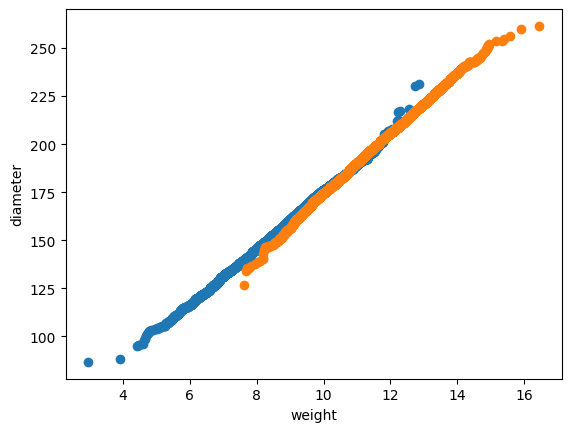

In [ ]:
plt.scatter(orange_diameter, orange_weight)
plt.scatter(grapefruit_diameter, grapefruit_weight)
plt.xlabel('weight')
plt.ylabel('diameter')
plt.show()

### 특성 추출

In [ ]:
diameter = orange_diameter + grapefruit_diameter
weight = orange_weight + grapefruit_weight

In [ ]:
diameter[:5]

[2.96, 3.91, 4.42, 4.47, 4.48]

- 정답(label, target) 데이터를 더미 데이터로 생성
- 오렌지(0), 자몽(1)

In [ ]:
fruit_data = [[l,w] for l,w in zip(diameter, weight)]

In [ ]:
fruit_target = [0] * 5000 + [1] * 5000


In [ ]:
# 데이터 갯수 확인
print(len(fruit_data))
print(len(fruit_target))

10000
10000


### 훈련데이터와 테스트 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    fruit_data, fruit_target, test_size=0.2, shuffle=True, random_state=20
)

### Modeling: KNN 최근접이웃 분류

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.981875

In [ ]:
knn.score(X_test, y_test)

0.9655

**예측 데이터**
- 지름 10.19, 무게 177.33
- 지름 10.19, 무게 178.53

In [ ]:
result = knn.predict([[10.19, 177.33]])

if result == 0:
    print('orange')
else:
    print('grapefruit')

grapefruit


# 붓꽃(Iris) 품종 분류 분석

- 꽃잎(petal)의 길이와 너비, 꽃받침(sepal)의 길이와 너비를 관측한 데이터셋
- 세개의 품종을 가지고 있는 데이터셋
- 각각의 품종별 50개의 샘플(데이터포인터)를 가지고 있다.
- 어떤 품종인지를 예측하는 모델을 만들어라

## 데이터 적재

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

- 파이썬의 딕셔너리와 유사한 형태인 Bunch 클래스로 반환한다.
- 키와 값으로 구성

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# iris의 키값만 추출
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR[:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


## 데이터 탐색

In [ ]:
# 데이터프레임 형태로 변환
## DataFrame(data, columns, index)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# target => species, 품종
sy = pd.Series(iris.target, dtype='category')
# 정형화된 값은 문자열로 변경하는 작업
sy = sy.cat.rename_categories(iris.target_names)
df['Species'] = sy
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail

<bound method NDFrame.tail of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target.shape

(150,)

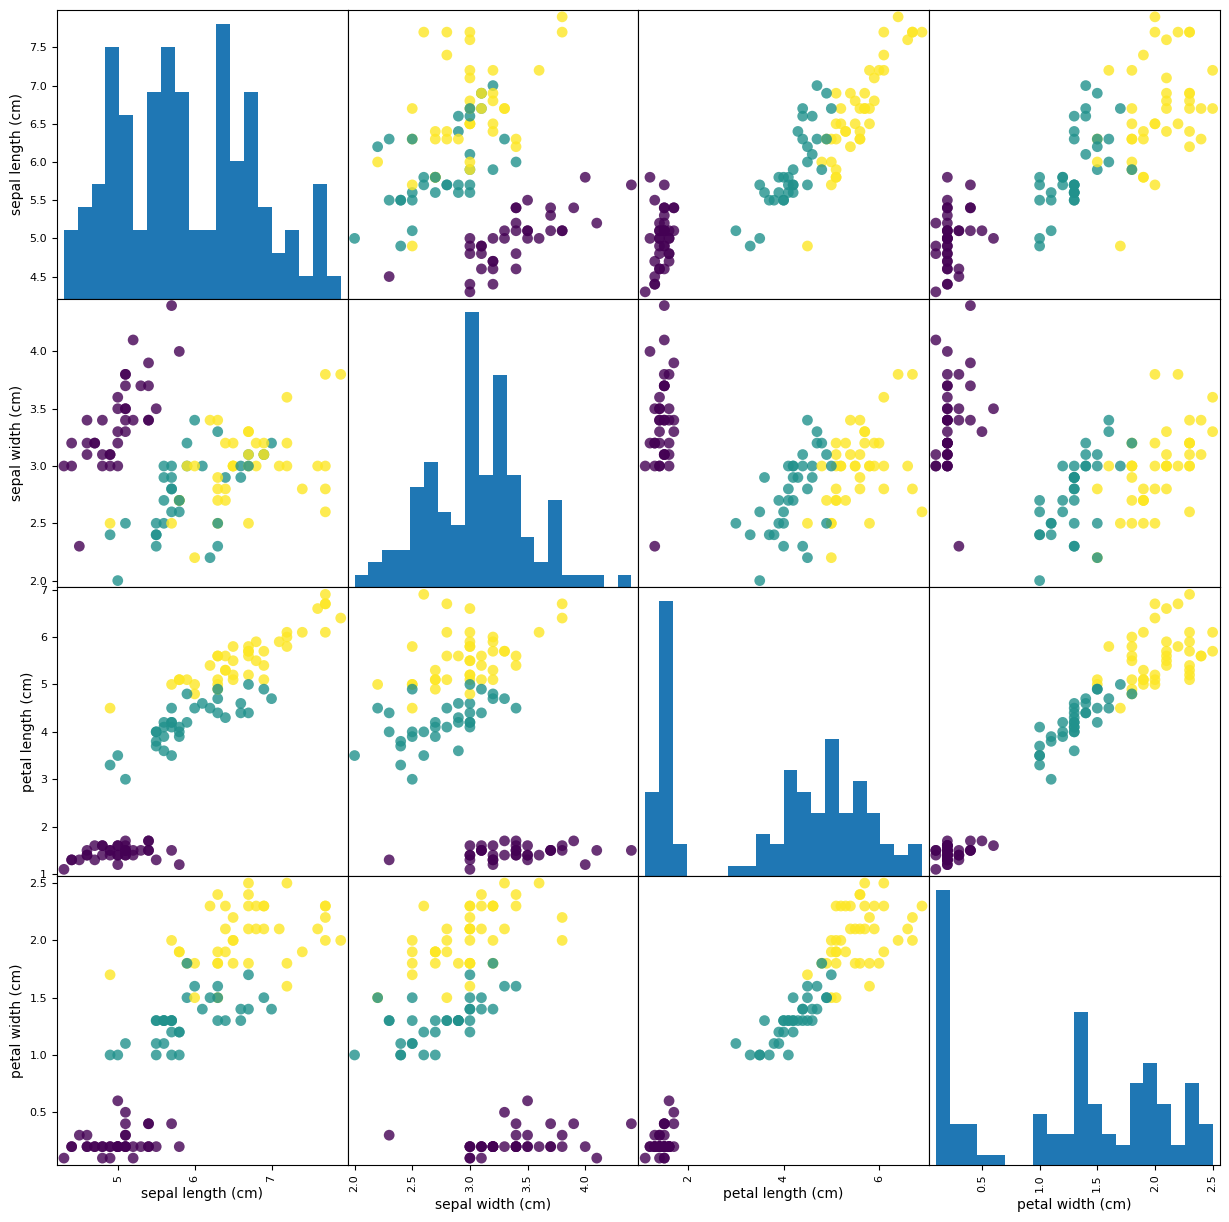

In [ ]:
# 시각화를 통한 탐색
# 분포: 산점도
# 산점도 행렬: scatter matrix

iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
# pairplot
pd.plotting.scatter_matrix(iris_df, c = y_train, figsize = (15, 15), marker = 'o',
                           hist_kwds ={'bins':20}, s = 60, alpha = .8)

plt.show()

## 훈련 데이터와 테스트 데이터 분리

- 훈련 데이터: 머신러닝 모델을 만들 때 사용한다
- 테스트 데이터(홀드아웃세트): 모델이 얼마나 잘 작동하는지 측정하는데 사용한다
- 검증 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


## Modeling

- KNN-최근접 이웃 알고리즘(단점: 적절한 k의 선택이 필요하다.)
- k가 너무 작을 때: Overfitting(과대적합)
- k가 너무 클 때: Underfitting(과소적합)
- 모델이 복잡할수록 훈련 데이터에 대해서는 더 정확하게 예측한다.
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

- KNeighborsClassifier(algorithm='auto', leaf_size=30,
n_neighbors=5, metric='minkowski', metric_params=None, n_jobs=1, p=2, weights='uniform')


In [ ]:
# 모델 평가
knn.score(X_train, y_train) # 100%,과대적합

1.0

In [ ]:
# 예측
X_train[0]

array([5.9, 3. , 4.2, 1.5])

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])

yhat = knn.predict(X_new)

print('예측결과: ', yhat)
print('예측 타깃 이름: ', iris.target_names[yhat])

예측결과:  [0]
예측 타깃 이름:  ['setosa']


### 모델 평가하기

In [ ]:
# 예측결과
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

In [ ]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print(f'{X_test[i]}:{iris.target_names[yhat]}')

[5.8 2.8 5.1 2.4]:virginica
[6.  2.2 4.  1. ]:versicolor
[5.5 4.2 1.4 0.2]:setosa
[7.3 2.9 6.3 1.8]:virginica
[5.  3.4 1.5 0.2]:setosa
[6.3 3.3 6.  2.5]:virginica
[5.  3.5 1.3 0.3]:setosa
[6.7 3.1 4.7 1.5]:versicolor
[6.8 2.8 4.8 1.4]:versicolor
[6.1 2.8 4.  1.3]:versicolor
[6.1 2.6 5.6 1.4]:virginica
[6.4 3.2 4.5 1.5]:versicolor
[6.1 2.8 4.7 1.2]:versicolor
[6.5 2.8 4.6 1.5]:versicolor
[6.1 2.9 4.7 1.4]:versicolor
[4.9 3.6 1.4 0.1]:setosa
[6.  2.9 4.5 1.5]:versicolor
[5.5 2.6 4.4 1.2]:versicolor
[4.8 3.  1.4 0.3]:setosa
[5.4 3.9 1.3 0.4]:setosa
[5.6 2.8 4.9 2. ]:virginica
[5.6 3.  4.5 1.5]:versicolor
[4.8 3.4 1.9 0.2]:setosa
[4.4 2.9 1.4 0.2]:setosa
[6.2 2.8 4.8 1.8]:virginica
[4.6 3.6 1.  0.2]:setosa
[5.1 3.8 1.9 0.4]:setosa
[6.2 2.9 4.3 1.3]:versicolor
[5.  2.3 3.3 1. ]:versicolor
[5.  3.4 1.6 0.4]:setosa
[6.4 3.1 5.5 1.8]:virginica
[5.4 3.  4.5 1.5]:versicolor
[5.2 3.5 1.5 0.2]:setosa
[6.1 3.  4.9 1.8]:virginica
[6.4 2.8 5.6 2.2]:virginica
[5.2 2.7 3.9 1.4]:versicolor
[5.7 3.8 1.7 

### 최적의 k 찾기

- sklearn의 서브 패키지인 metrics에 다양한 분류용 성능평가지표를 제공한다.
- confusition matrix(실제값, 예측값): 혼돈행렬
- accuracy_score(실제값, 예측값)

In [ ]:
from sklearn.metrics import accuracy_score

# n : 1~ 100

n = 100

# 정확도를 담는 리스트 생성
acc = np.zeros([n-1]) # [0] * 99

for n in range(1,n):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)

print(acc)

[0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.94736842
 0.94736842 0.94736842 0.94736842 0.92105263 0.89473684 0.94736842
 0.94736842 0.97368421 0.92105263 0.94736842 0.92105263 0.94736842
 0.92105263 0.92105263 0.92105263 0.86842105 0.89473684 0.86842105
 0.86842105 0.89473684 0.89473684 0.89473684 0.89473684 0.86842105
 0.89473684 0.89473684 0.89473684 0.86842105 0.92105263 0.89473684
 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684
 0.89473684 0.89473684 0.81578947 0.81578947 0.81578947 0.84210526
 0.84210526 0.84210526 0.71052632 0.68421053 0.65789474 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.60526316 0.60526316 0.60526316 0.60526316 0.60526316 0.6052

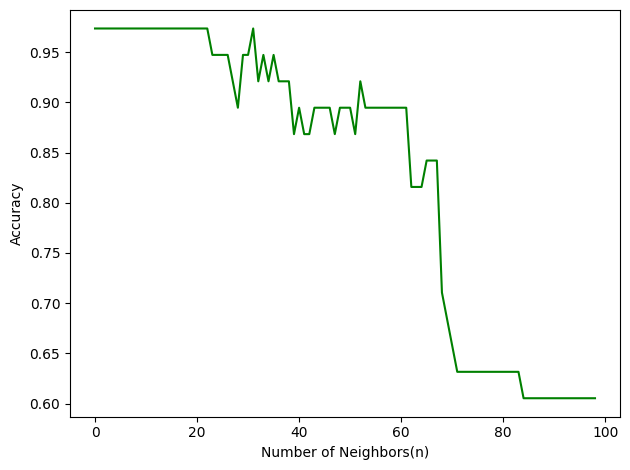

In [ ]:
# 시각화를 통한 확인
plt.plot(range(n), acc, 'g')
plt.xlabel('Number of Neighbors(n)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# 확인학습

- 와인데이터 : 와인의 화학 성분을 이용하여 와인의 종류를 예측하기 위한 데이터셋

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
wine.keys

<function Bunch.keys>